In [24]:
import support
from IPython.core.debugger import set_trace
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle


class perceptron:
    
    def __init__(self, train_data, train_labels, bias, rate, n_epoch, rnd, shuffle):
        self.num_images = train_data.shape[0]
        self.num_labels = 10
        self.num_features = 1024
        self.ind_list  = [i for i in range(self.num_images)]
        self.learning_curve = np.zeros(n_epoch)
        self.learning_rate = rate
        self.conf_mtx = np.zeros((10,10))
        if bias == 1:
            if rnd == 1:
                self.bias_w = np.random.uniform(-1 ,1, 10)
            else:
                self.bias_w = np.zeros(10)
        else:
            self.bias_w = np.zeros(10)
            
        if rnd == 1:
            self.weights = np.random.uniform(-1 ,1, (10, self.num_features))
        else:
            self.weights = np.zeros((self.num_labels, self.num_features))
        self.weights = self.train_model(train_data, train_labels, n_epoch, bias, shuffle)
    
    def predict(self, test_feature, bias):
        weights_mtx = np.zeros((10, 32, 32))
        pred_weights = np.zeros((10, 32, 32))
        pred_sum = np.zeros(10)
        for i in np.arange(10):
            weights_mtx[i] = np.reshape(self.weights[i,:1024],(32,32))
            pred_weights[i] = np.multiply(test_feature, weights_mtx[i])
            pred_sum[i] = (sum(sum(pred_weights[i])))
            if bias == 1:
                pred_sum[i] += self.bias_w[i]
        
        pred_result = np.argmax(pred_sum)
        #print(pred_sum)
        return pred_result
    
    def update_weights(self, class_num, pred_num, rate, weights, sample, bias):
        class_weights_mtx = np.zeros((32, 32))
        class_weights_mtx = np.reshape(weights[class_num,:1024],(32,32))
        class_weights_mtx = class_weights_mtx + rate * sample
        #print(class_weights_mtx)
        
        pred_weights_mtx = np.zeros((32, 32))
        pred_weights_mtx = np.reshape(weights[pred_num,:1024],(32,32))
        pred_weights_mtx = pred_weights_mtx - rate * sample
        
        weights[class_num, :] = class_weights_mtx.flatten()
        weights[pred_num, :] = pred_weights_mtx.flatten()
        if bias == 1:
            self.bias_w[class_num] += rate
            self.bias_w[pred_num] -= rate
        
    
    def train_model(self, train_data, train_labels, n_epoch, bias, shuffle):
        weights = self.weights
        tot = 0
        acc = 0
        for round in np.arange(n_epoch):
            self.learning_rate = 1 / (round + 1)
            #self.learning_rate = np.log(n_epoch + 10 - round)
            #self.learning_rate = 1
            if shuffle == 1:
                np.random.shuffle(self.ind_list)
            for i in np.arange(self.num_images):
                sample = self.ind_list[i]
                tot += 1
                pred_result = self.predict(train_data[sample, :, :], bias)
                if pred_result != train_labels[sample]:
                    self.update_weights(train_labels[sample], pred_result, self.learning_rate, weights, train_data[sample, :, :], bias)
                else:
                    acc += 1
            self.learning_curve[round] = acc / tot;
            if self.learning_curve[round] == 1:
                print("Training Converges at round: ", round)
                break
            if round > 1 and self.learning_curve[round] < self.learning_curve[round-1]:
                print("Training Converges at round: ", round)
                break
            
        return weights

    def test_model(self, test_data, test_labels, bias):
        precision = 0
        for sample in np.arange(test_data.shape[0]):
            result = model.predict(test_data[sample, :, :], bias)
            self.conf_mtx[result, test_labels[sample]] += 1
            if result == test_labels[sample]:
                precision += 1
            else:
                print(result, test_labels[sample])
                
        print("Precision: ", precision/test_data.shape[0])

8 [2]
8 [2]
8 [2]
9 [4]
8 [4]
5 [8]
5 [9]
8 [2]
4 [7]
8 [4]
8 [1]
9 [4]
7 [1]
3 [1]
4 [6]
5 [2]
Precision:  0.963963963963964


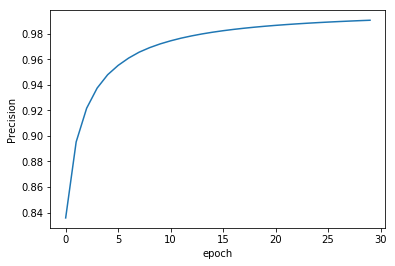

[ 0.83579639  0.8953202   0.92172961  0.9375      0.94794745  0.95525452
  0.96100164  0.96561987  0.96916621  0.97208539  0.97451112  0.97660099
  0.97836933  0.97991438  0.98125342  0.98242508  0.9834589   0.98437785
  0.98520007  0.98594007  0.98660959  0.98721824  0.98777397  0.98828339
  0.98875205  0.98918467  0.98958523  0.98995719  0.99030349  0.99062671]
[[ 36.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  42.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  36.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.  33.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  55.   0.   1.   1.   0.   0.]
 [  0.   0.   1.   0.   0.  58.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   0.  42.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.  46.   0.   0.]
 [  0.   1.   4.   0.   2.   0.   0.   0.  39.   0.]
 [  0.   0.   0.   0.   2.   0.   0.   0.   0.  41.]]


In [42]:
import support as sup
import numpy as np
import matplotlib.pyplot as plt

#np.set_printoptions(threshold=np.nan)
bias = 1
n_epoch = 30
rnd = 0
rate = 1
shuffle = 1

train_data,train_labels = sup.read_data('digitdata/optdigits-orig_train.txt')
test_data, test_labels = sup.read_data('digitdata/optdigits-orig_test.txt')

model = perceptron(train_data, train_labels, bias, rate, n_epoch, rnd, shuffle)

model.test_model(test_data, test_labels, bias)

plt.plot(model.learning_curve)
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.show()
print(model.learning_curve)
print(model.conf_mtx)


